<a href="https://colab.research.google.com/github/priya1804/THE-PIMA-INDIAN-DIABETES-DATABASE/blob/main/LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Load the basic libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 2. Load the dataset
data = pd.read_csv('/content/diabetes.csv')
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [6]:
# 3. Analyze the dataset
print(f"Dataset Shape: {data.shape}")
print("Dataset Description:\n", data.describe())

Dataset Shape: (768, 9)
Dataset Description:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    

In [24]:
# 4. Check correlation with the target variable
correlations = data.corr()
print("\nCorrelation with target 'Outcome':")
print(correlations['Outcome'].sort_values(ascending=False))


Correlation with target 'Outcome':
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


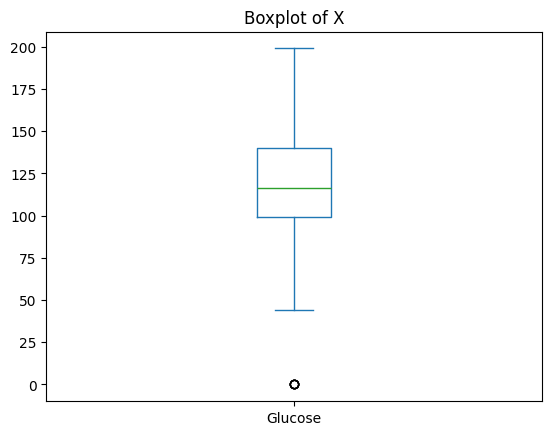

In [25]:
# 4. Pre-process the data
# Assuming 'x' and 'y' are the columns for features and target
x_value = data.iloc[0:700, 1]
y_value = data.iloc[0:700, 1]  # Select the target column
x_value.plot(kind='box', title='Boxplot of X')
plt.show()

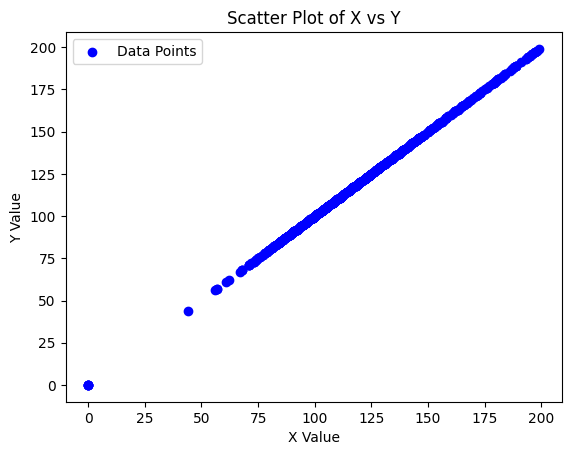

In [26]:
# 5. Visualize the data
plt.scatter(x_value, y_value, label='Data Points', color='blue')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Scatter Plot of X vs Y')
plt.legend()
plt.show()

In [27]:
# 6. Separate the feature and prediction value columns
x_features = x_value.values
y_features = y_value.values

In [28]:
# 7. Write the Hypothesis Function
def hypothesis(theta_array, x):
    return theta_array[0] + theta_array[1] * x

In [29]:
# 8. Write the Cost Function
def cost_function(theta_array, x, y, m):
    total_cost = 0
    for i in range(m):
        total_cost += ((theta_array[0] + theta_array[1] * x[i]) - y[i]) ** 2
    return total_cost / (2 * m)

In [30]:
# 9. Write the Gradient Descent optimization algorithm
def gradient_descent(theta_array, x, y, m, alpha):
    summation_0 = 0
    summation_1 = 0
    for i in range(m):
        summation_0 += ((theta_array[0] + theta_array[1] * x[i]) - y[i])
        summation_1 += (((theta_array[0] + theta_array[1] * x[i]) - y[i]) * x[i])

    new_theta0 = theta_array[0] - (summation_0 * alpha / m)
    new_theta1 = theta_array[1] - (summation_1 * alpha / m)
    improvised_theta = [new_theta0, new_theta1]
    return improvised_theta

In [31]:
# 10. Apply the training over the dataset to minimize the loss
def training(x, y, alpha, epochs):
    theta_0 = 0
    theta_1 = 0
    m = len(x)
    cost_values = []
    theta_array = [theta_0, theta_1]
    for i in range(epochs):
        theta_array = gradient_descent(theta_array, x, y, m, alpha)
        loss = cost_function(theta_array, x, y, m)
        cost_values.append(loss)

        # Plot the regression line during training
        if i % (epochs // 10) == 0 or i == epochs - 1:
            y_pred = theta_array[0] + theta_array[1] * x
            plt.scatter(x, y, label='Original Data', color='blue')
            plt.plot(x, y_pred, label=f'Epoch {i}', color='red')
            plt.xlabel('X Value')
            plt.ylabel('Y Value')
            plt.title(f'Regression Line at Epoch {i}')
            plt.legend()
            plt.show()

    # Plot cost function vs iterations
    plt.plot(range(epochs), cost_values, label='Cost Function')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost Function vs Epochs')
    plt.legend()
    plt.show()

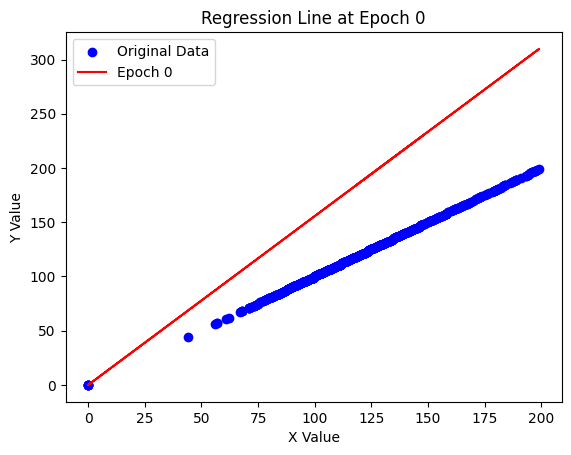

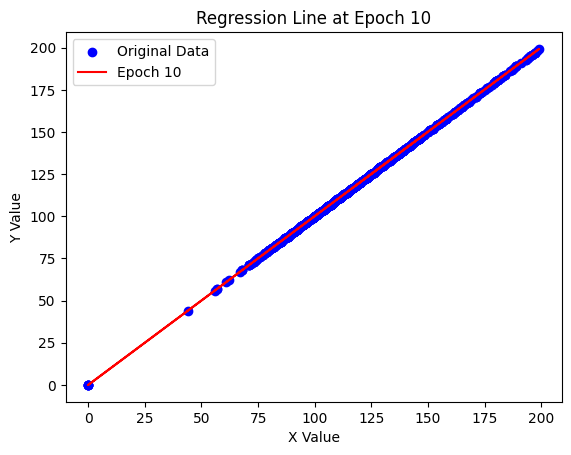

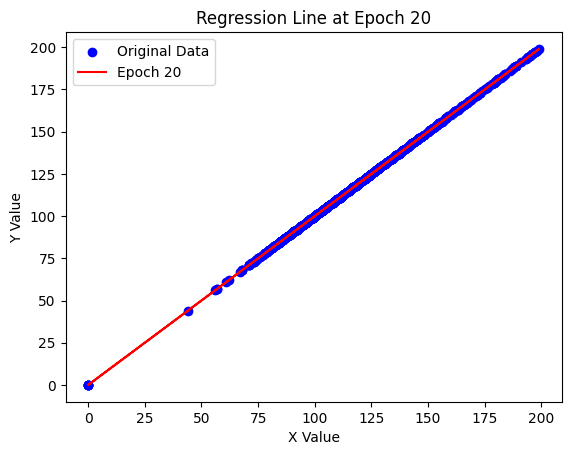

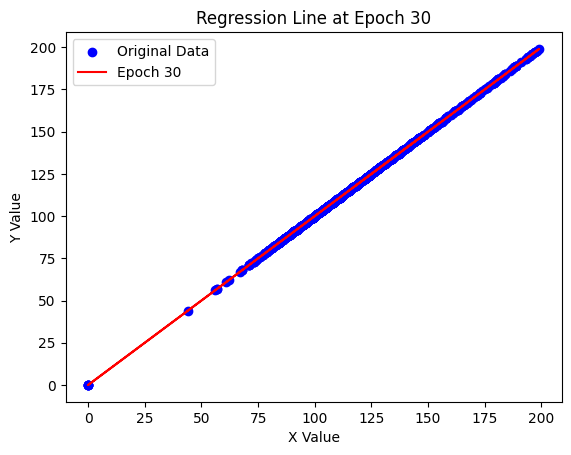

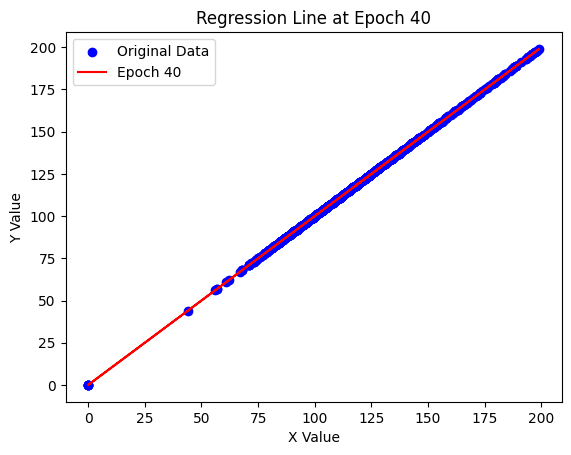

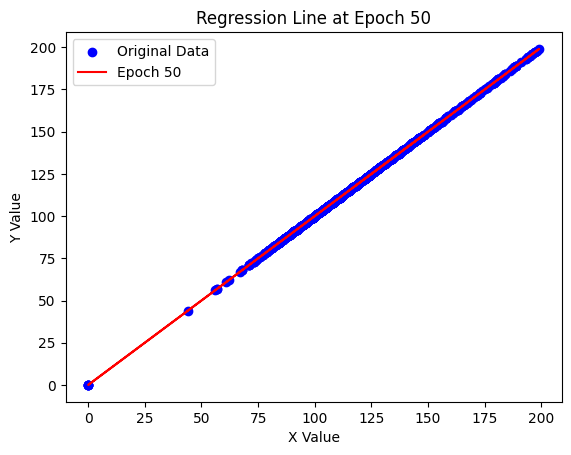

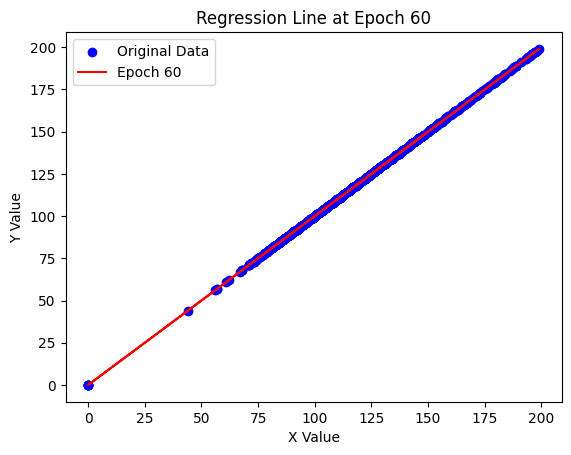

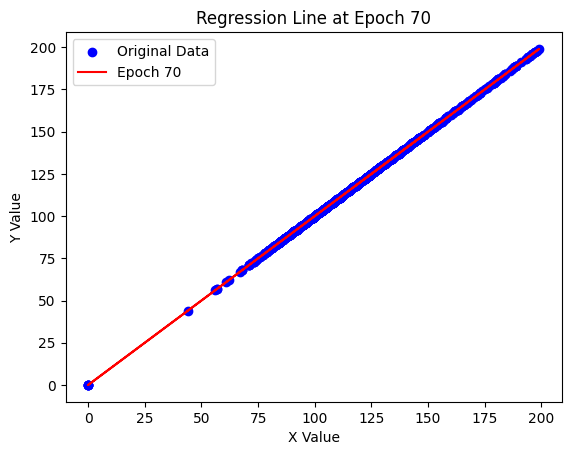

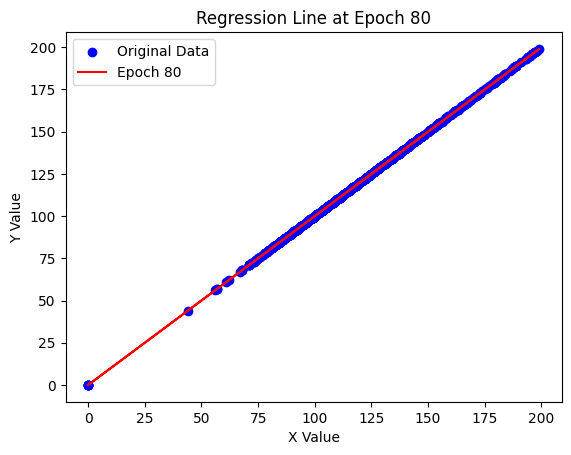

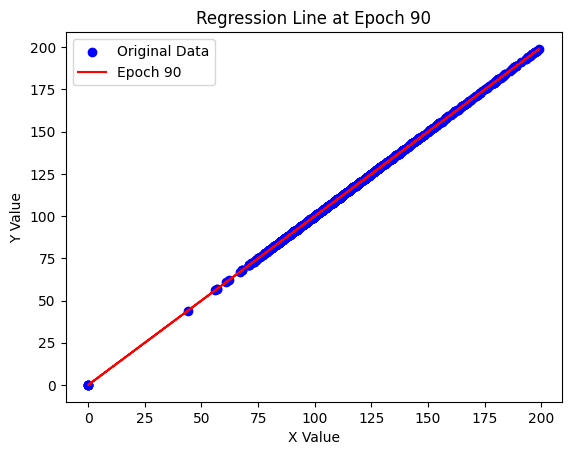

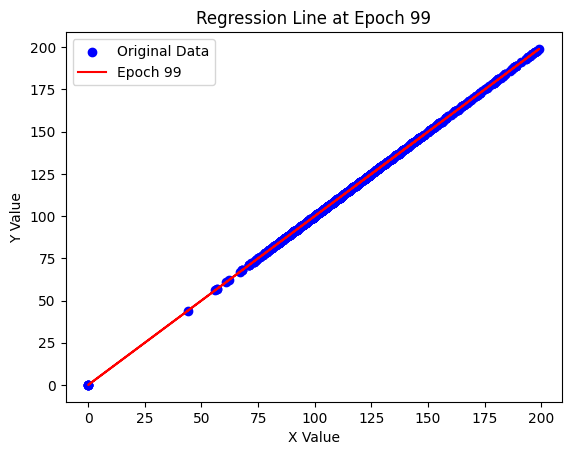

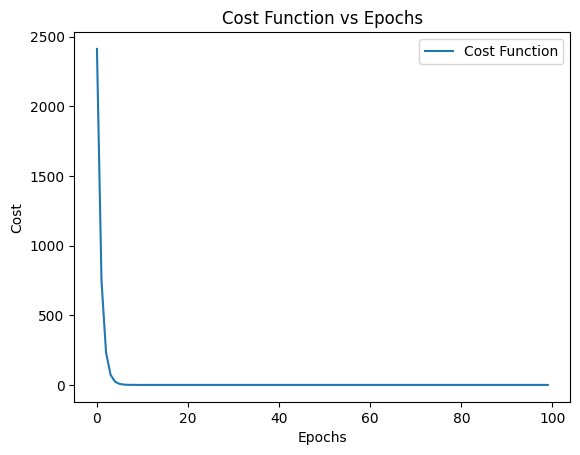

In [32]:
# 11. Find the best fit line to the given dataset
x_features = x_features.reshape(-1)
y_features = y_features.reshape(-1)
alpha = 0.0001
epochs = 100
training(x_features, y_features, alpha, epochs)

In [33]:
# 6. Pre-process the data
# Assuming 'x' and 'y' are the columns for features and target
x_value = data.iloc[0:700, 5]
y_value = data.iloc[0:700, -1]

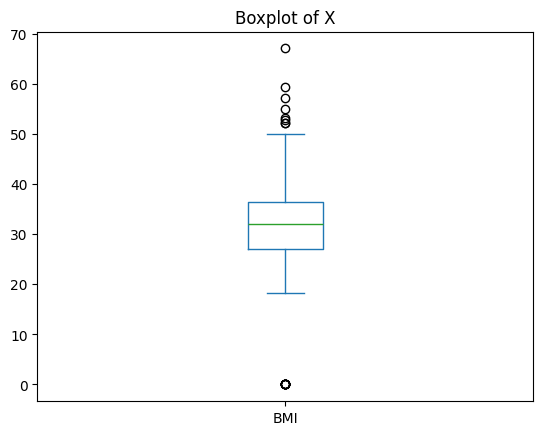

In [34]:
x_value.plot(kind='box', title='Boxplot of X')
plt.show()

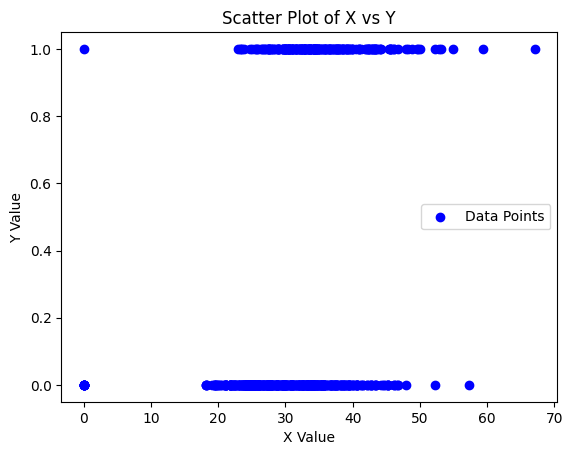

In [35]:
# 7. Visualize the data
plt.scatter(x_value, y_value, label='Data Points', color='blue')
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Scatter Plot of X vs Y')
plt.legend()
plt.show()

In [36]:
# 8. Separate the feature and prediction value columns
x_features = x_value.values
y_features = y_value.values

In [37]:
# 9. Write the Hypothesis Function
def hypothesis(theta_array, x):
    return theta_array[0] + theta_array[1] * x

In [39]:
# 10. Write the Cost Function
def cost_function(theta_array, x, y, m):
    total_cost = 0
    for i in range(m):
        total_cost += ((theta_array[0] + theta_array[1] * x[i]) - y[i]) ** 2
    return total_cost / (2 * m)


In [40]:
# 11. Write the Gradient Descent optimization algorithm
def gradient_descent(theta_array, x, y, m, alpha):
    summation_0 = 0
    summation_1 = 0
    for i in range(m):
        summation_0 += ((theta_array[0] + theta_array[1] * x[i]) - y[i])
        summation_1 += (((theta_array[0] + theta_array[1] * x[i]) - y[i]) * x[i])

    new_theta0 = theta_array[0] - (summation_0 * alpha / m)
    new_theta1 = theta_array[1] - (summation_1 * alpha / m)
    improvised_theta = [new_theta0, new_theta1]
    return improvised_theta

In [41]:
# 12. Apply the training over the dataset to minimize the loss
def training(x, y, alpha, epochs):
    theta_0 = 0
    theta_1 = 0
    m = len(x)
    cost_values = []
    theta_array = [theta_0, theta_1]
    for i in range(epochs):
        theta_array = gradient_descent(theta_array, x, y, m, alpha)
        loss = cost_function(theta_array, x, y, m)
        cost_values.append(loss)

        # Plot the regression line during training
        if i % (epochs // 10) == 0 or i == epochs - 1:
            y_pred = theta_array[0] + theta_array[1] * x
            plt.scatter(x, y, label='Original Data', color='blue')
            plt.plot(x, y_pred, label=f'Epoch {i}', color='red')
            plt.xlabel('X Value')
            plt.ylabel('Y Value')
            plt.title(f'Regression Line at Epoch {i}')
            plt.legend()
            plt.show()

    # Plot cost function vs iterations
    plt.plot(range(epochs), cost_values, label='Cost Function')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost Function vs Epochs')
    plt.legend()
    plt.show()


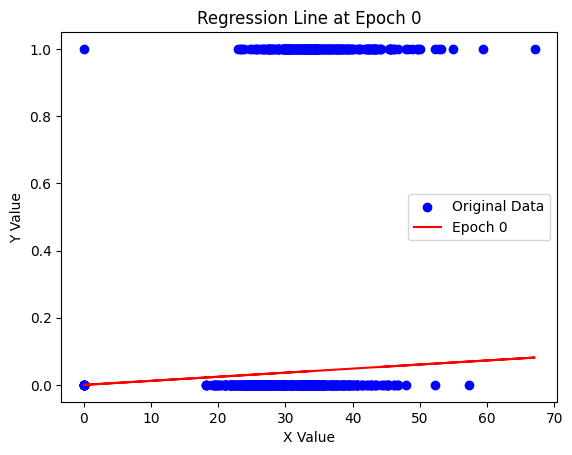

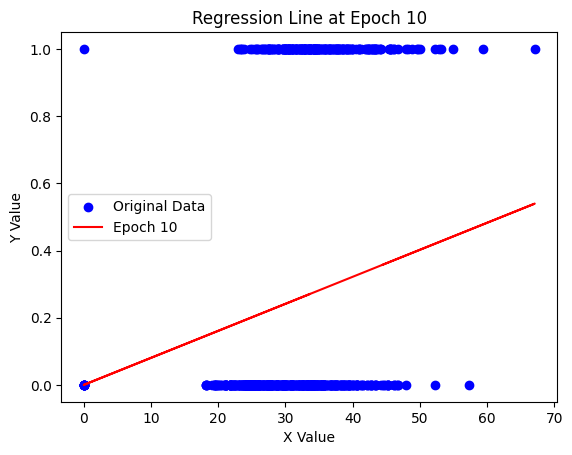

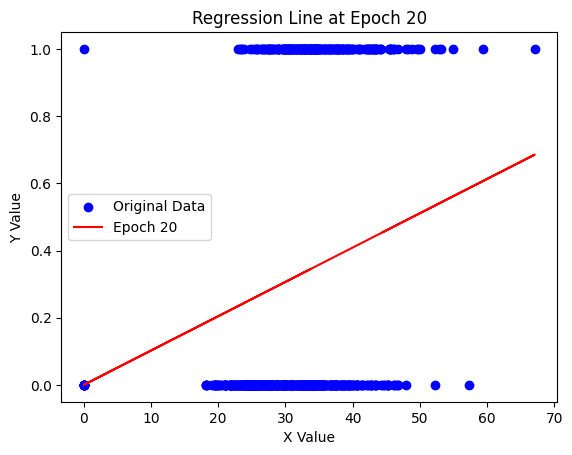

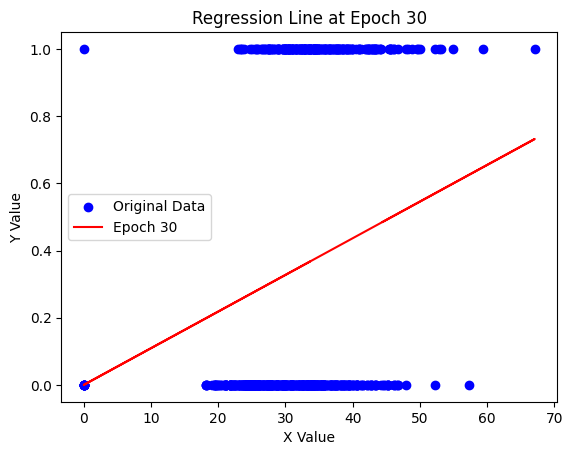

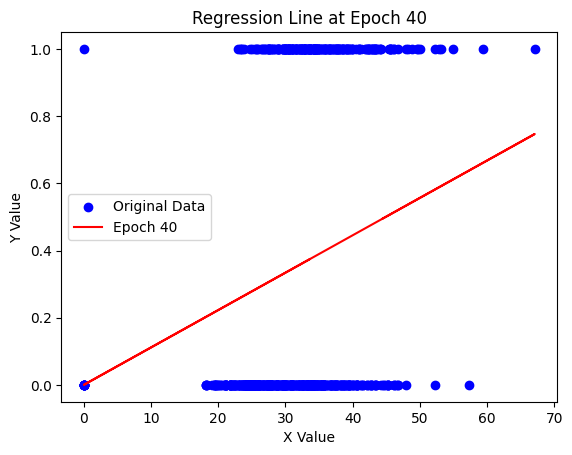

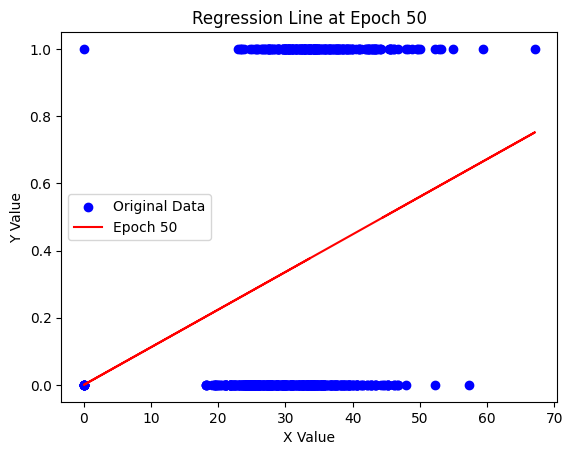

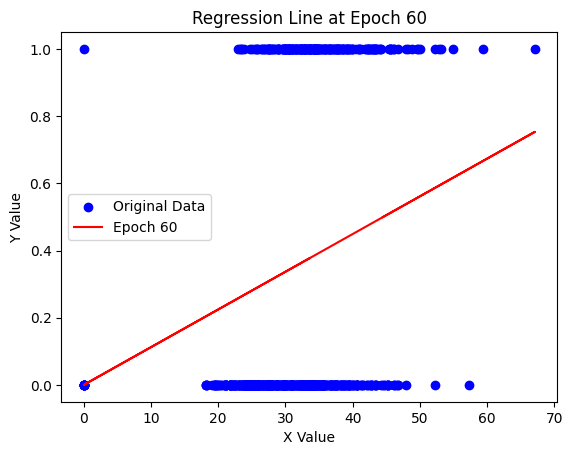

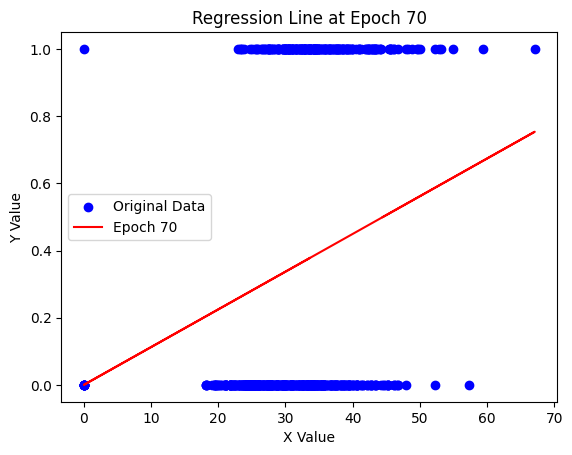

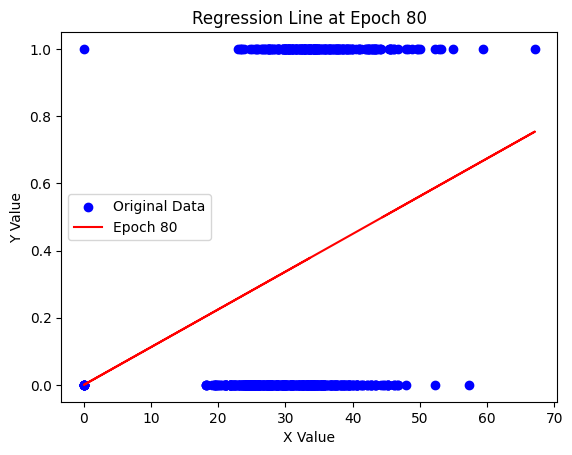

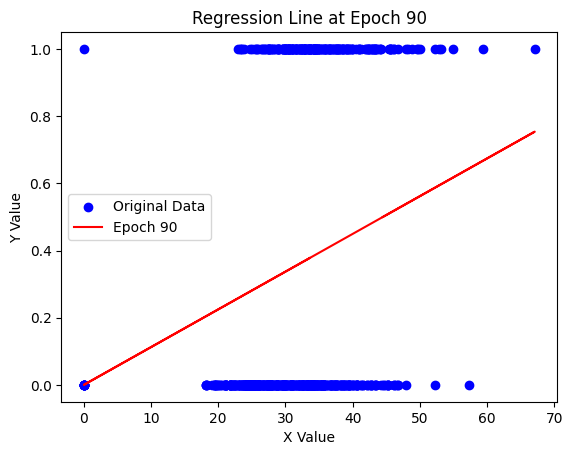

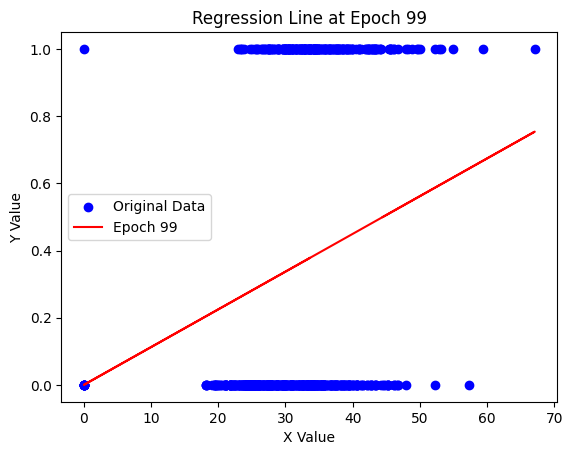

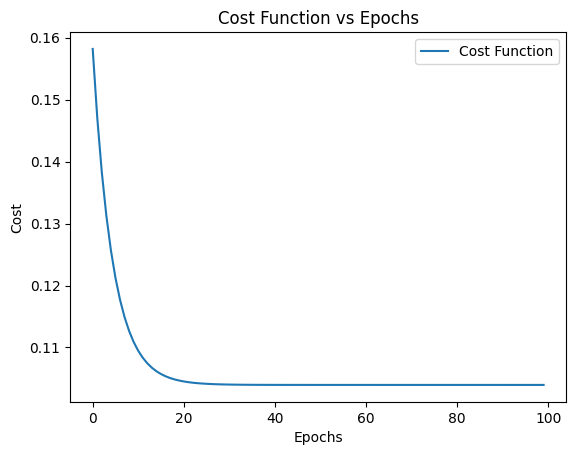

In [42]:
# 13. Find the best fit line to the given dataset
x_features = x_features.reshape(-1)
y_features = y_features.reshape(-1)
alpha = 0.0001
epochs = 100
training(x_features, y_features, alpha, epochs)